<a href="https://colab.research.google.com/github/yvnnng/COGS108_Repo/blob/main/Copy_of_LEGO_Project_Analysis_3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
from urllib.request import Request, urlopen

# Import seaborn and apply its plotting styles
import seaborn as sns

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# set plotting size parameter
plt.rcParams['figure.figsize'] = (12, 5)

#improve resolution
%config InlineBackend.figure_format ='retina'


In [ ]:
brickset = pd.read_csv('https://raw.githubusercontent.com/nk0305/COGS108_Repo/main/brickset.csv')
brickset.head()

,set_number,name,theme,subtheme,year,pieces,no_of_minifigs,minifig_list,rrp,ppp,...,value_new,value_used,notes,no_owned,no_want,rating,num_ratings,num_reviews,tags,designer
0,8630-1,Gold Hunt,Agents,NaN,2008,352.0,3.0,"['agt007', 'agt008', 'agt009']",NaN,8.5c,...,~$87.35,~$22.75,NaN,3182.0,1188,4.0,95.0,11.0,"['Agent Fuse', 'Gold Tooth', 'Henchman', '4X4'...",['Mark Stafford']
1,8631-1,Jetpack Pursuit,Agents,NaN,2008,88.0,2.0,"['agt004', 'agt005']",NaN,11.4c,...,~$36.18,~$10.11,NaN,4534.0,960,3.9,124.0,27.0,"['Agent Chase', 'Saw Fist', 'Aircraft', 'Dr In...",NaN
2,8632-1,Swamp Raid,Agents,NaN,2008,231.0,2.0,"['agt003', 'agt006']",NaN,8.7c,...,~$51.25,~$17.15,NaN,3564.0,1085,3.9,106.0,18.0,"['Agent Charge', 'Break Jaw', 'Boat', 'Crimina...",['Mark Stafford']
3,8633-1,Speedboat Rescue,Agents,NaN,2008,340.0,3.0,"['agt001a', 'agt002', 'agt003']",NaN,11.8c,...,~$90.56,~$35.70,NaN,2490.0,1239,3.9,75.0,9.0,"['Agent Chase', 'Agent Trace', 'Break Jaw', 'B...",['Raphael Pretesacque']
4,8634-1,Turbocar Chase,Agents,NaN,2008,498.0,3.0,"['agt001', 'agt008', 'agt015']",NaN,10.0c,...,~$220.00,~$52.70,NaN,2439.0,1433,4.3,76.0,9.0,"['Agent Chase', 'Henchman', 'Spy Clops', 'Airc...",['Raphael Pretesacque']


In [ ]:
brickset = brickset.drop(columns = ['packaging', 'subtheme', 'rrp', 'ppp', 'notes'])
brickset.columns = ['Set_number', 'Name', 'Theme','Year','Pieces','No_of_minifigs','Minifig_list','Launch_and_Exit','newValue','usedValue','No_owned','No_want','Rating','Num_ratings','Num_reviews','Tags','Designer']
#Define a function to clean 'Launch_and_Exit' column

def clean_LnE(string):

    new_string = re.sub(r'\([^)]*\)', '', string)

    return new_string

#Apply the function to designated column

brickset['Launch_and_Exit'] = brickset['Launch_and_Exit'].astype('str')
brickset['Launch_and_Exit'] = brickset['Launch_and_Exit'].apply(clean_LnE)

#Separate launch and exit date

for date in brickset['Launch_and_Exit']:
 sep_string = re.split(" - ", date)

#create two new columns based on separated dates. Then, delete original "Launch_and_Exit" column

brickset['Launch_Date'] = sep_string[0]

brickset['Exit_Date'] = sep_string[1]

brickset = brickset.drop(columns = 'Launch_and_Exit')

#Finally, review the updated dataset

brickset.head()

,Set_number,Name,Theme,Year,Pieces,No_of_minifigs,Minifig_list,newValue,usedValue,No_owned,No_want,Rating,Num_ratings,Num_reviews,Tags,Designer,Launch_Date,Exit_Date
0,8630-1,Gold Hunt,Agents,2008,352.0,3.0,"['agt007', 'agt008', 'agt009']",~$87.35,~$22.75,3182.0,1188,4.0,95.0,11.0,"['Agent Fuse', 'Gold Tooth', 'Henchman', '4X4'...",['Mark Stafford'],1 Jul 2002,31 Dec 2003
1,8631-1,Jetpack Pursuit,Agents,2008,88.0,2.0,"['agt004', 'agt005']",~$36.18,~$10.11,4534.0,960,3.9,124.0,27.0,"['Agent Chase', 'Saw Fist', 'Aircraft', 'Dr In...",NaN,1 Jul 2002,31 Dec 2003
2,8632-1,Swamp Raid,Agents,2008,231.0,2.0,"['agt003', 'agt006']",~$51.25,~$17.15,3564.0,1085,3.9,106.0,18.0,"['Agent Charge', 'Break Jaw', 'Boat', 'Crimina...",['Mark Stafford'],1 Jul 2002,31 Dec 2003
3,8633-1,Speedboat Rescue,Agents,2008,340.0,3.0,"['agt001a', 'agt002', 'agt003']",~$90.56,~$35.70,2490.0,1239,3.9,75.0,9.0,"['Agent Chase', 'Agent Trace', 'Break Jaw', 'B...",['Raphael Pretesacque'],1 Jul 2002,31 Dec 2003
4,8634-1,Turbocar Chase,Agents,2008,498.0,3.0,"['agt001', 'agt008', 'agt015']",~$220.00,~$52.70,2439.0,1433,4.3,76.0,9.0,"['Agent Chase', 'Henchman', 'Spy Clops', 'Airc...",['Raphael Pretesacque'],1 Jul 2002,31 Dec 2003


In [ ]:
print(brickset.shape)
print(brickset.info())
brickset.describe()

(15252, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15252 entries, 0 to 15251
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Set_number      15023 non-null  object 
 1   Name            15023 non-null  object 
 2   Theme           15252 non-null  object 
 3   Year            15252 non-null  object 
 4   Pieces          14646 non-null  float64
 5   No_of_minifigs  9008 non-null   float64
 6   Minifig_list    8666 non-null   object 
 7   newValue        11004 non-null  object 
 8   usedValue       10233 non-null  object 
 9   No_owned        14975 non-null  float64
 10  No_want         15252 non-null  int64  
 11  Rating          8176 non-null   float64
 12  Num_ratings     8176 non-null   float64
 13  Num_reviews     8338 non-null   float64
 14  Tags            15252 non-null  object 
 15  Designer        3140 non-null   object 
 16  Launch_Date     15252 non-null  object 
 17  Exit_Date       152

,Pieces,No_of_minifigs,No_owned,No_want,Rating,Num_ratings,Num_reviews
count,14646.000000,9008.000000,14975.000000,15252.000000,8176.000000,8176.000000,8338.000000
mean,248.577769,2.686945,2398.919933,820.640047,3.863796,117.937011,4.652555
std,501.607747,2.882958,3240.627230,1110.336861,0.359171,131.767826,6.089852
min,0.000000,1.000000,3.000000,1.000000,1.600000,9.000000,1.000000
25%,25.000000,1.000000,204.500000,125.000000,3.600000,40.000000,1.000000
50%,82.000000,2.000000,1064.000000,451.000000,3.900000,75.000000,3.000000
75%,270.000000,3.000000,3345.500000,1050.000000,4.100000,144.000000,5.000000
max,11695.000000,80.000000,30286.000000,14247.000000,4.900000,1523.000000,93.000000


In [ ]:
# Pull color data
req = Request(
    url='https://www.bricklink.com/catalogColors.asp?v=0&itemType=P&itemNo=',
    headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:122.0) Gecko/20100101 Firefox/122.0'}
)
color_bricklink_tables = pd.read_html(urlopen(req))

# Helper functions
def extract_first_date(string):
    string = string.replace('\xa0','')
    match = re.match(r'(\d+)-(\d+)', string)
    if match == None:
        return np.nan
    else:
        return match.group(1)

def extract_last_date(string):
    string = string.replace('\xa0','')
    match = re.match(r'(\d+)-(\d+)', string)
    if match == None:
        return np.nan
    else:
        return match.group(2)

def bricklink_fix(df):
    df = df.dropna(axis=1, how='all')
    df.columns = df.iloc[0]
    df = df.drop(df.index[0])
    #print(df.head())
    df = df.set_index('ID')
    #df['Color Timeline'].apply(extract_dates)
    df['First Year Active'] = df['Color Timeline'].apply(extract_first_date)
    df['Recent Year Active'] = df['Color Timeline'].apply(extract_last_date)
    df = df.drop("Color Timeline", axis=1)
    return df

# Fix all of the tables and combine them
bricklink_tables = []
bricklink_tables.append(bricklink_fix(color_bricklink_tables[4]))
bricklink_tables.append(bricklink_fix(color_bricklink_tables[7]))
bricklink_tables.append(bricklink_fix(color_bricklink_tables[10]))
bricklink_tables.append(bricklink_fix(color_bricklink_tables[13]))
bricklink_tables.append(bricklink_fix(color_bricklink_tables[16]))
bricklink_tables.append(bricklink_fix(color_bricklink_tables[19]))
bricklink_tables.append(bricklink_fix(color_bricklink_tables[22]))
bricklink_tables.append(bricklink_fix(color_bricklink_tables[25]))
bricklink_tables.append(bricklink_fix(color_bricklink_tables[28]))
bricklink = pd.concat(bricklink_tables)
bricklink = bricklink.dropna()
bricklink.head()

,Name,Parts,In Sets,Wanted,For Sale,First Year Active,Recent Year Active
ID,,,,,,,
1,White,15362,11334,22530,15638,1949,2024
49,Very Light Gray,21,24,1425,63,1997,2004
99,Very Light Bluish Gray,53,49,1836,104,2004,2013
86,Light Bluish Gray,4796,7627,8784,5389,2003,2024
9,Light Gray,1863,3204,5845,2485,1954,2008


In [ ]:
def get_bricklink_id(string):
    string = string.strip()
    match = re.match(r'(\d+)', string)
    if match:
        return match.group(1)
    else:
        return None  # Return an appropriate value when there is no match

# Use the correct raw URL to the CSV file on GitHub
csv_url = 'https://raw.githubusercontent.com/yvnnng/COGS108_Repo/main/colors_updated.csv'

# Read the CSV file from the provided URL
try:
    colors_detailed = pd.read_csv(csv_url)
except Exception as e:
    print(f"Error reading CSV file: {e}")
    colors_detailed = pd.DataFrame()

# These colors do not have official names or have any dates. These colors are extremely rare, so we probably don't need them.
colors_detailed = colors_detailed.dropna(axis=0, subset=['LEGO', 'First Year', 'BrickLink'])
colors_detailed = colors_detailed.drop(['Img', 'Unnamed: 0', 'ID', 'First Year', 'Last Year', 'Name'], axis=1)
colors_detailed['BrickLink ID'] = colors_detailed['BrickLink'].apply(get_bricklink_id)
colors_detailed = colors_detailed.set_index('BrickLink ID')

# Assuming bricklink is defined earlier in your code
colors_df = pd.merge(colors_detailed, bricklink, left_index=True, right_index=True)
colors_df.head()

,RGB,Num Parts,Num Sets,LEGO,LDraw,BrickLink,BrickOwl,Name,Parts,In Sets,Wanted,For Sale,First Year Active,Recent Year Active
1,FFFFFF,421686,123247,1 ['White'],15 ['White'],1 ['White'],92 ['White'],White,15362,11334,22530,15638,1949,2024
10,6D6E5C,22319,7750,"27 ['Dark grey', 'DK.GREY']",8 ['Dark_Gray'],10 ['Dark Gray'],53 ['Dark Gray'],Dark Gray,1054,1706,4181,1495,1961,2006
100,DF6695,233,49,114 ['Tr. Medium Reddish-Violet w. Glitter 2%'...,114 ['Glitter_Trans_Dark_Pink'],100 ['Glitter Trans-Dark Pink'],132 ['Transparent Pink Glitter'],Glitter Trans-Dark Pink,12,40,150,16,1999,2024
101,FFFFFF,233,41,"117 ['Transparent Glitter', 'TR.W.GLITTER'] 12...",117 ['Glitter_Trans_Clear'],101 ['Glitter Trans-Clear'],131 ['Transparent Glitter'],Glitter Trans-Clear,16,33,175,21,1999,2023
102,A5A5CB,140,67,"129 ['Tr. Bright Bluish Violet w. Glitter 2%',...",129 ['Glitter_Trans_Purple'],102 ['Glitter Trans-Purple'],22 ['Transparent Purple Glitter'],Glitter Trans-Purple,10,60,173,12,2000,2024


#### SQ3: Does the color variability contribute to set popularity?

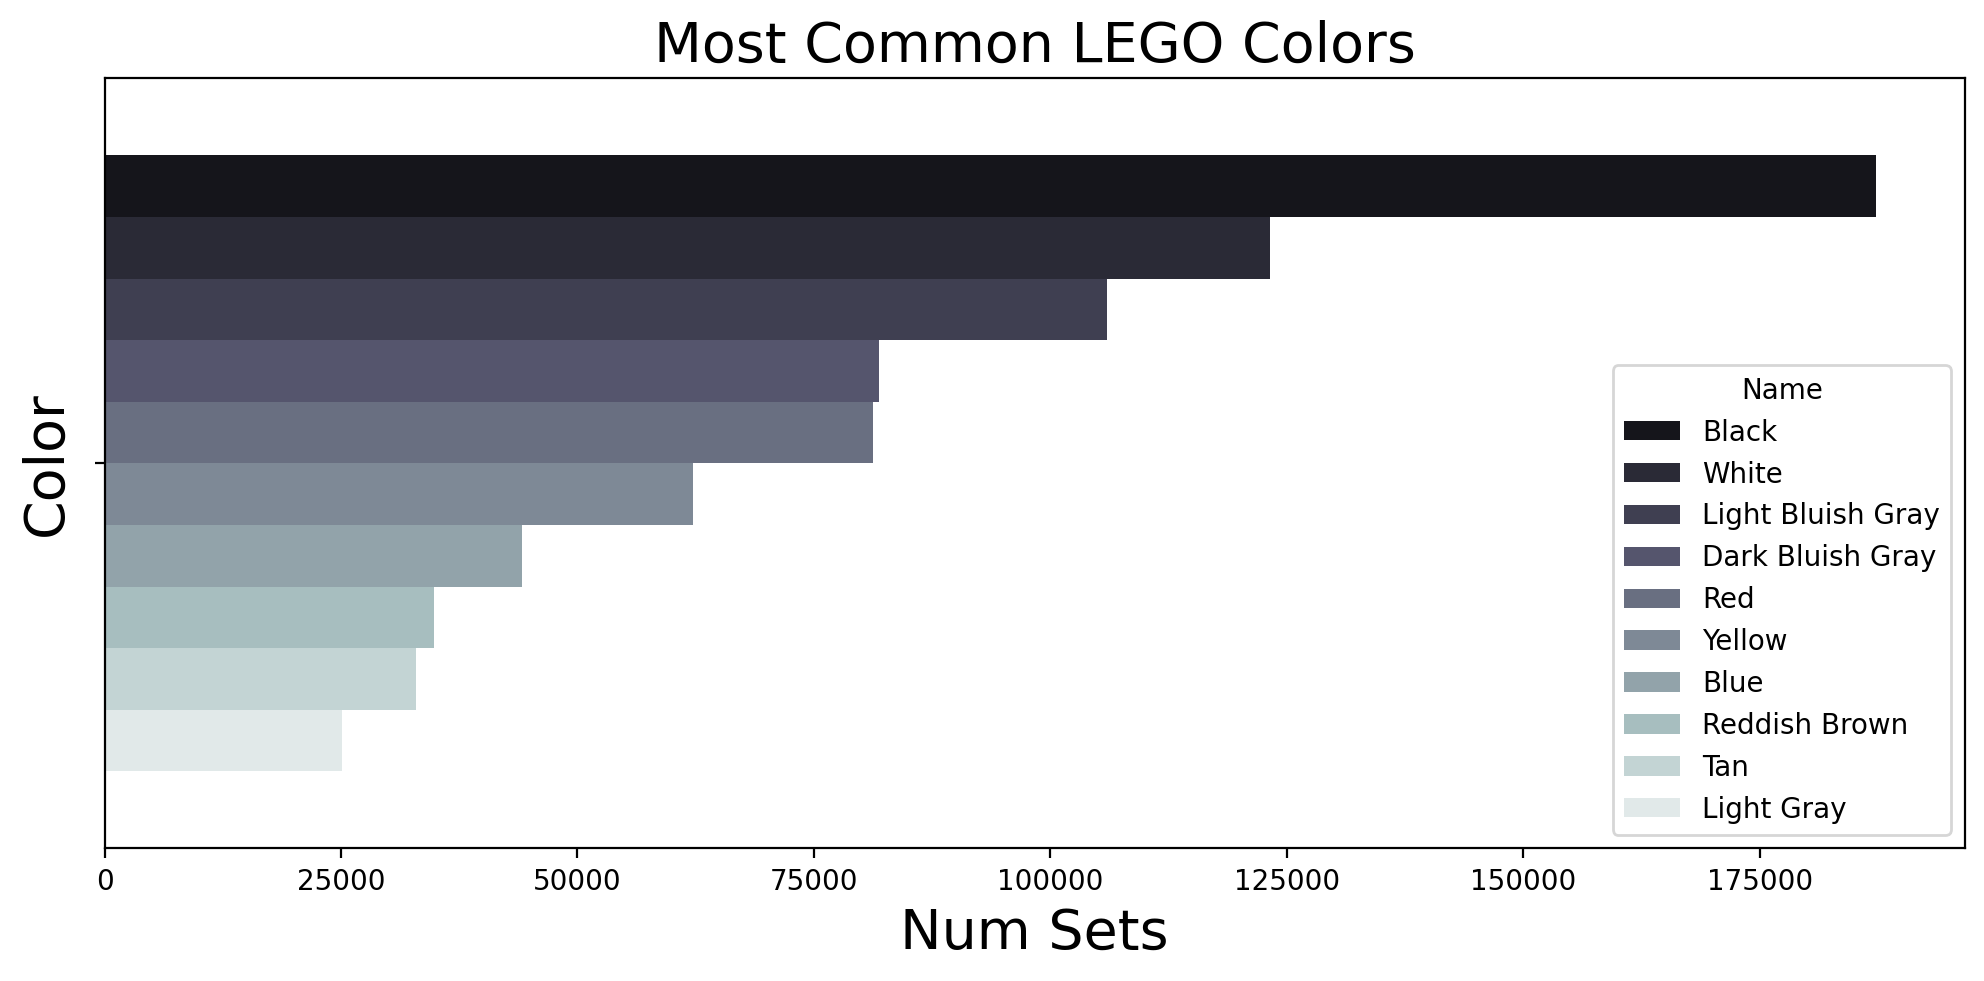

In [ ]:
# Taking a look at the Top 10 LEGO Colors by the Number of Sets
top10_colors = colors_df.sort_values(by='Num Sets', ascending=False).head(10)
sns.barplot(x='Num Sets', hue='Name', data= top10_colors, palette='bone')

plt.title('Most Common LEGO Colors', fontsize = 20)
plt.xlabel('Num Sets', fontsize = 20)
plt.ylabel('Color', fontsize = 20);


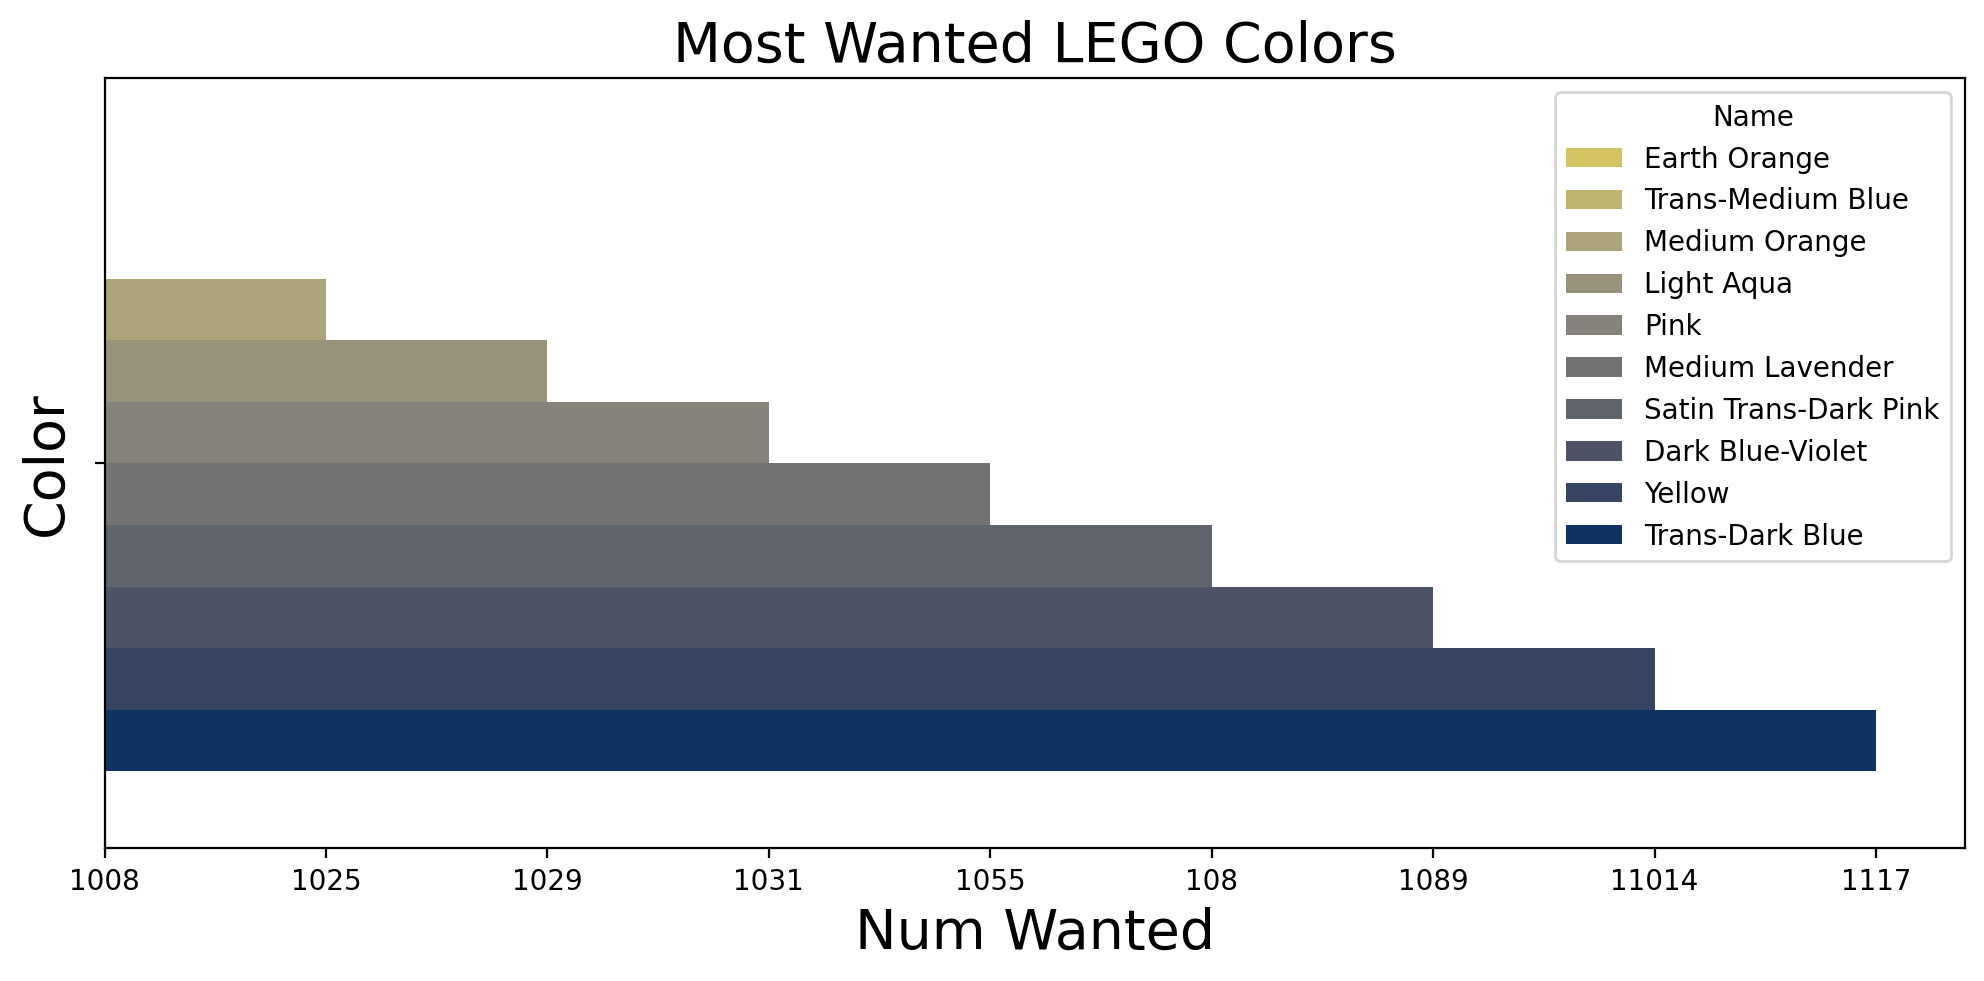

In [ ]:
# Taking a look at the Top 10 Most Wanted Colors
most_wanted_colors = colors_df.sort_values(by='Wanted', ascending=True).head(10)
sns.barplot(x='Wanted', hue='Name', data= most_wanted_colors, palette='cividis_r')
plt.title('Most Wanted LEGO Colors', fontsize = 20)
plt.xlabel('Num Wanted', fontsize = 20)
plt.ylabel('Color', fontsize = 20);

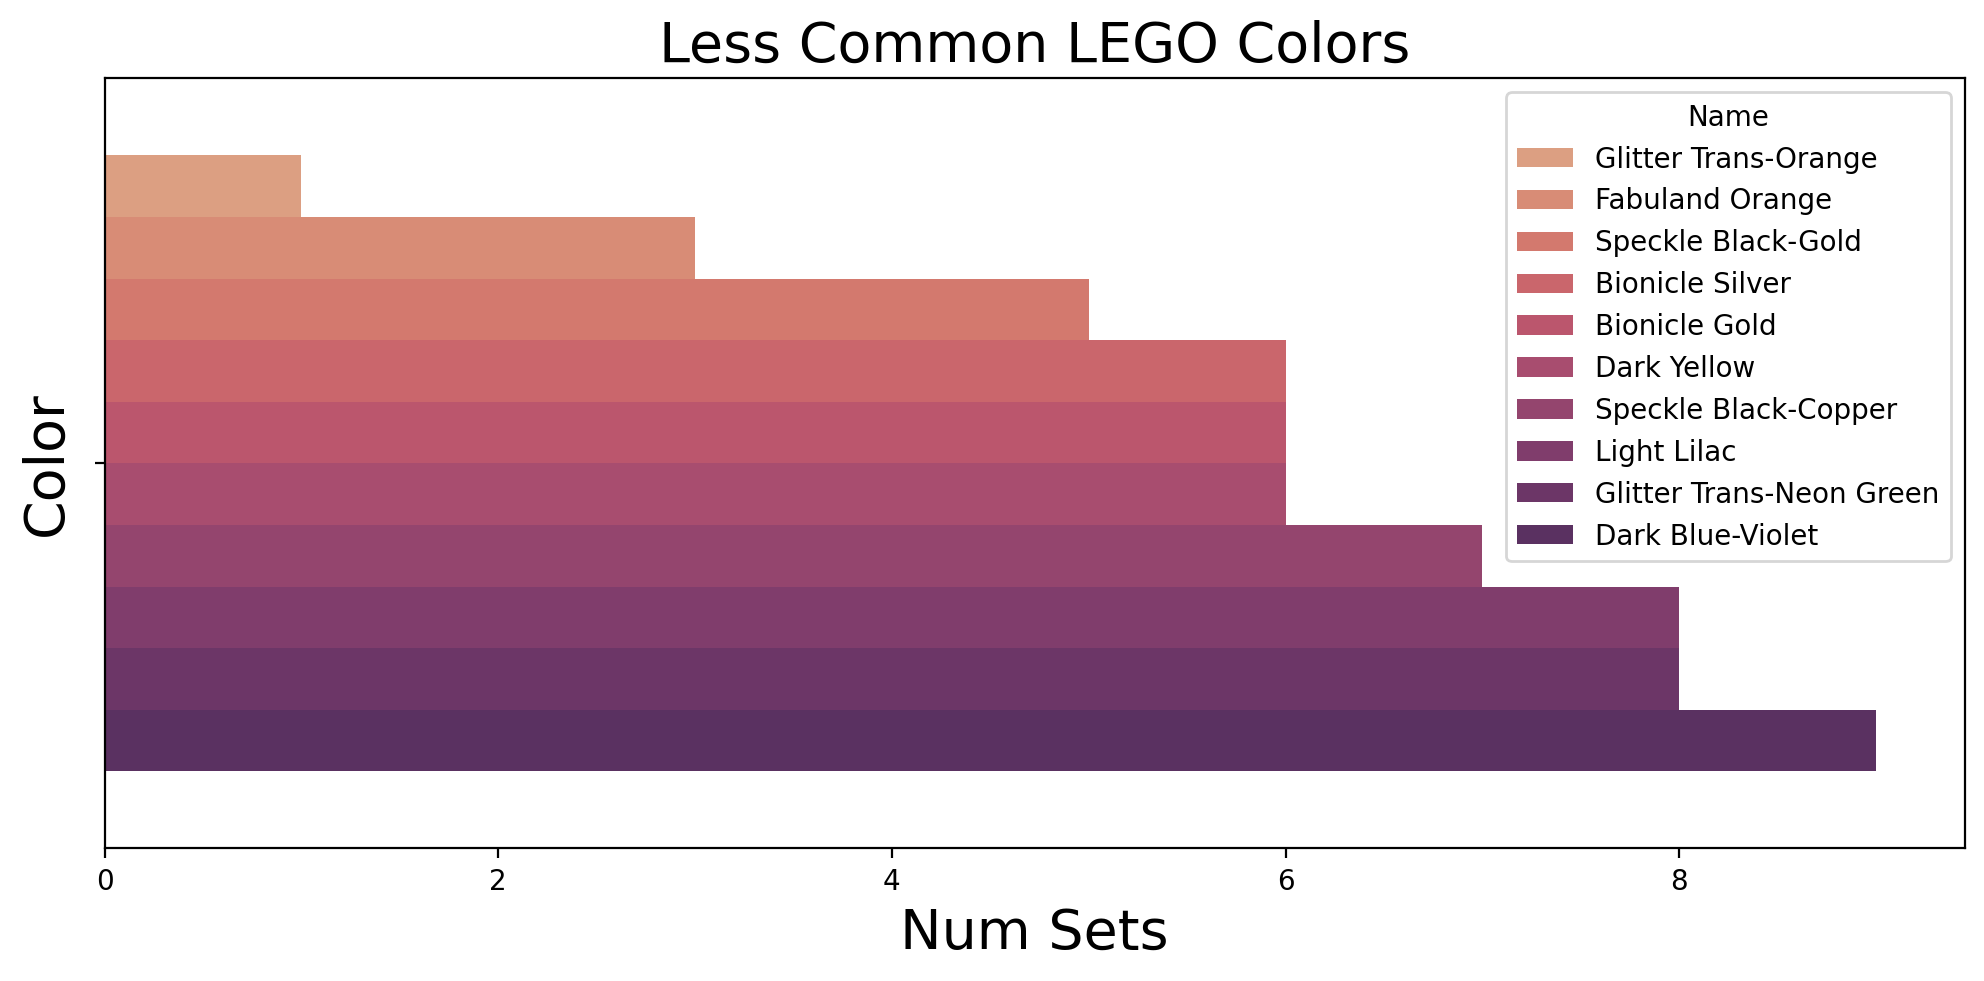

In [ ]:
# Taking a look at the Bottom 10 Colors by the Number of Sets
bot10_colors = colors_df.sort_values(by='Num Sets', ascending=True).head(10)
sns.barplot(x='Num Sets', hue='Name', data= bot10_colors, palette='flare')
plt.title('Less Common LEGO Colors', fontsize = 20)
plt.xlabel('Num Sets', fontsize = 20)
plt.ylabel('Color', fontsize = 20);

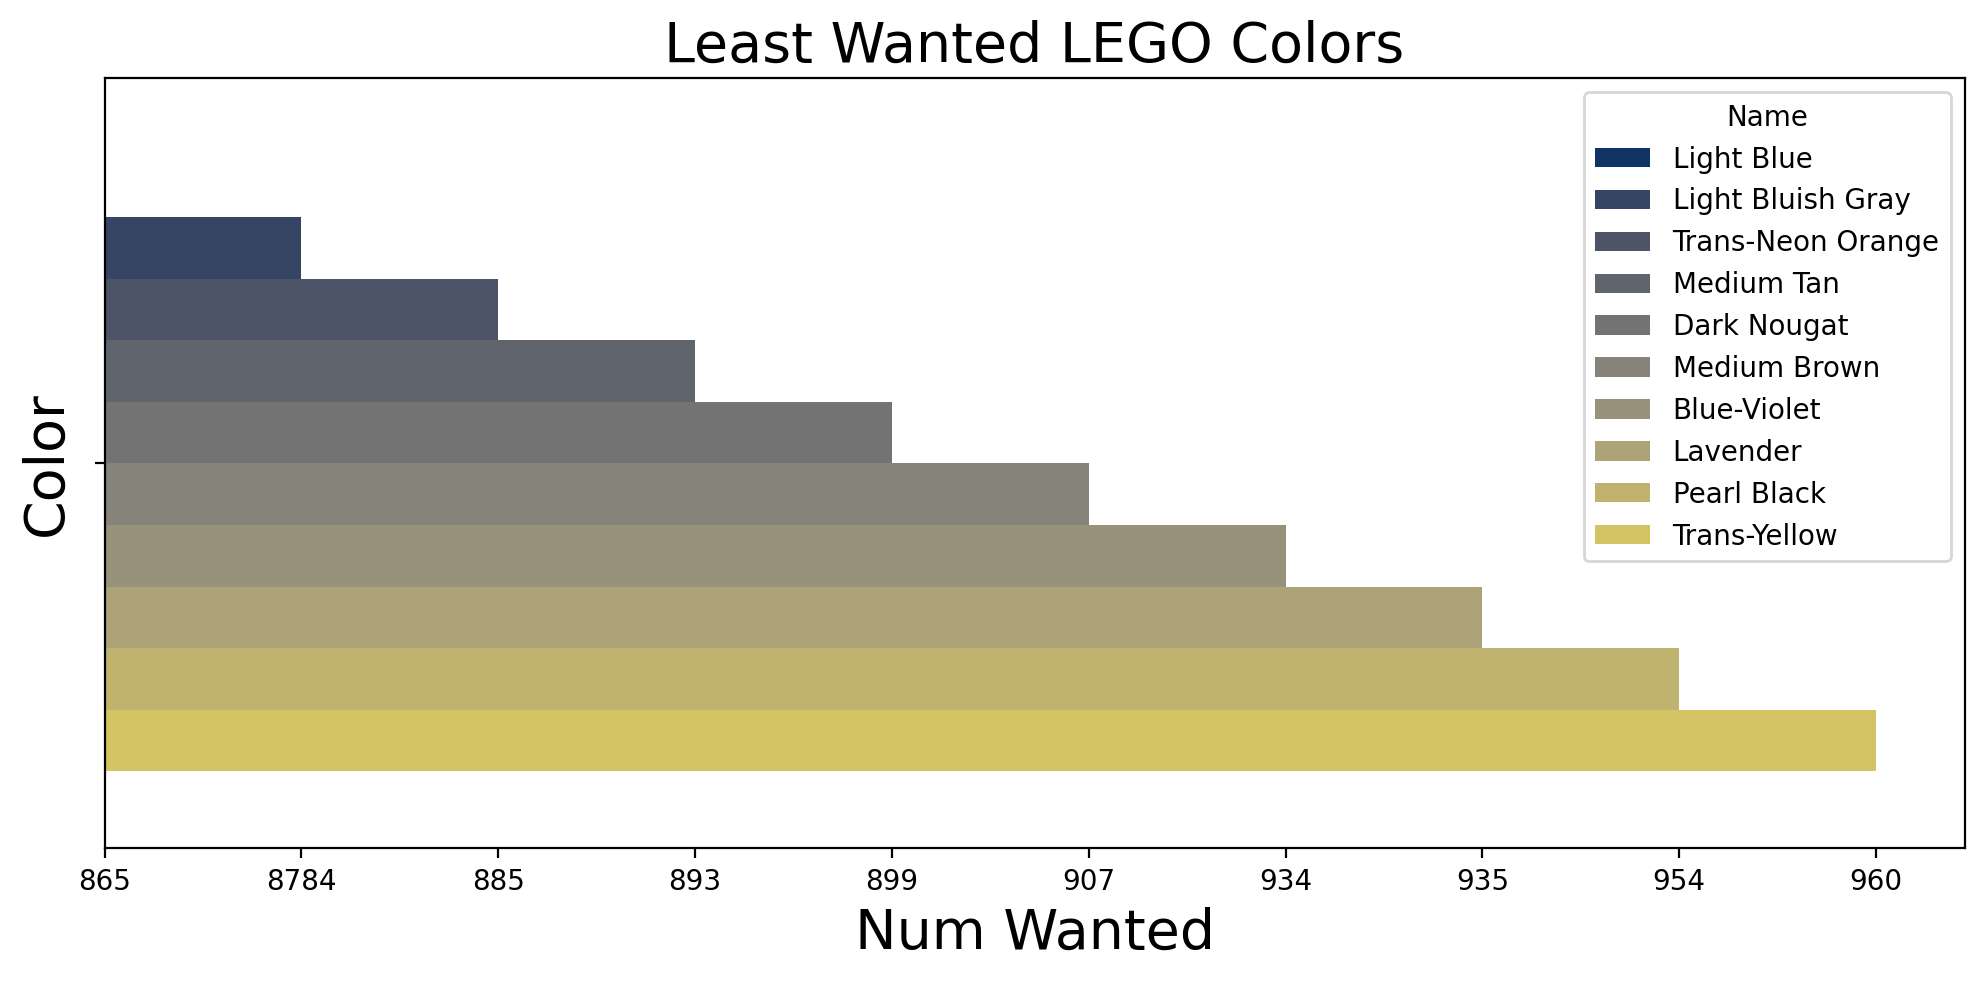

In [ ]:
# Taking a look at the Least Wanted 10 Colors by the Number of Sets
least_wanted_colors = colors_df.sort_values(by='Wanted', ascending=True).tail(10)
sns.barplot(x='Wanted', hue='Name', data= least_wanted_colors, palette='cividis')
plt.title('Least Wanted LEGO Colors', fontsize = 20)
plt.xlabel('Num Wanted', fontsize = 20)
plt.ylabel('Color', fontsize = 20);

#### SQ3 Analysis
Most wanted LEGO colors does not always match most common in LEGO sets, however Yellow seems to be the exception. Most common colors are generic and have wide applications whereas the most wanted colors are unique such as Satin Trans-Dark Pink and Medium Lavender. Less common colors tend to be more specific such as "Glitter Trans-Neon Green" or "Dark Blue-Violet". Interestly though, we do not see less common colors being on the most wanted list either. To further round out our colors analysis, we took at look at least wanted colors and see that it also does not correlate with most wanted or most common colors. Thus, there might be too much color variability and this would not be a solid feature for a prediction model to determine the popularity of a LEGO set.

#### SQ4: Does price variability have a significant impact on set popularity?

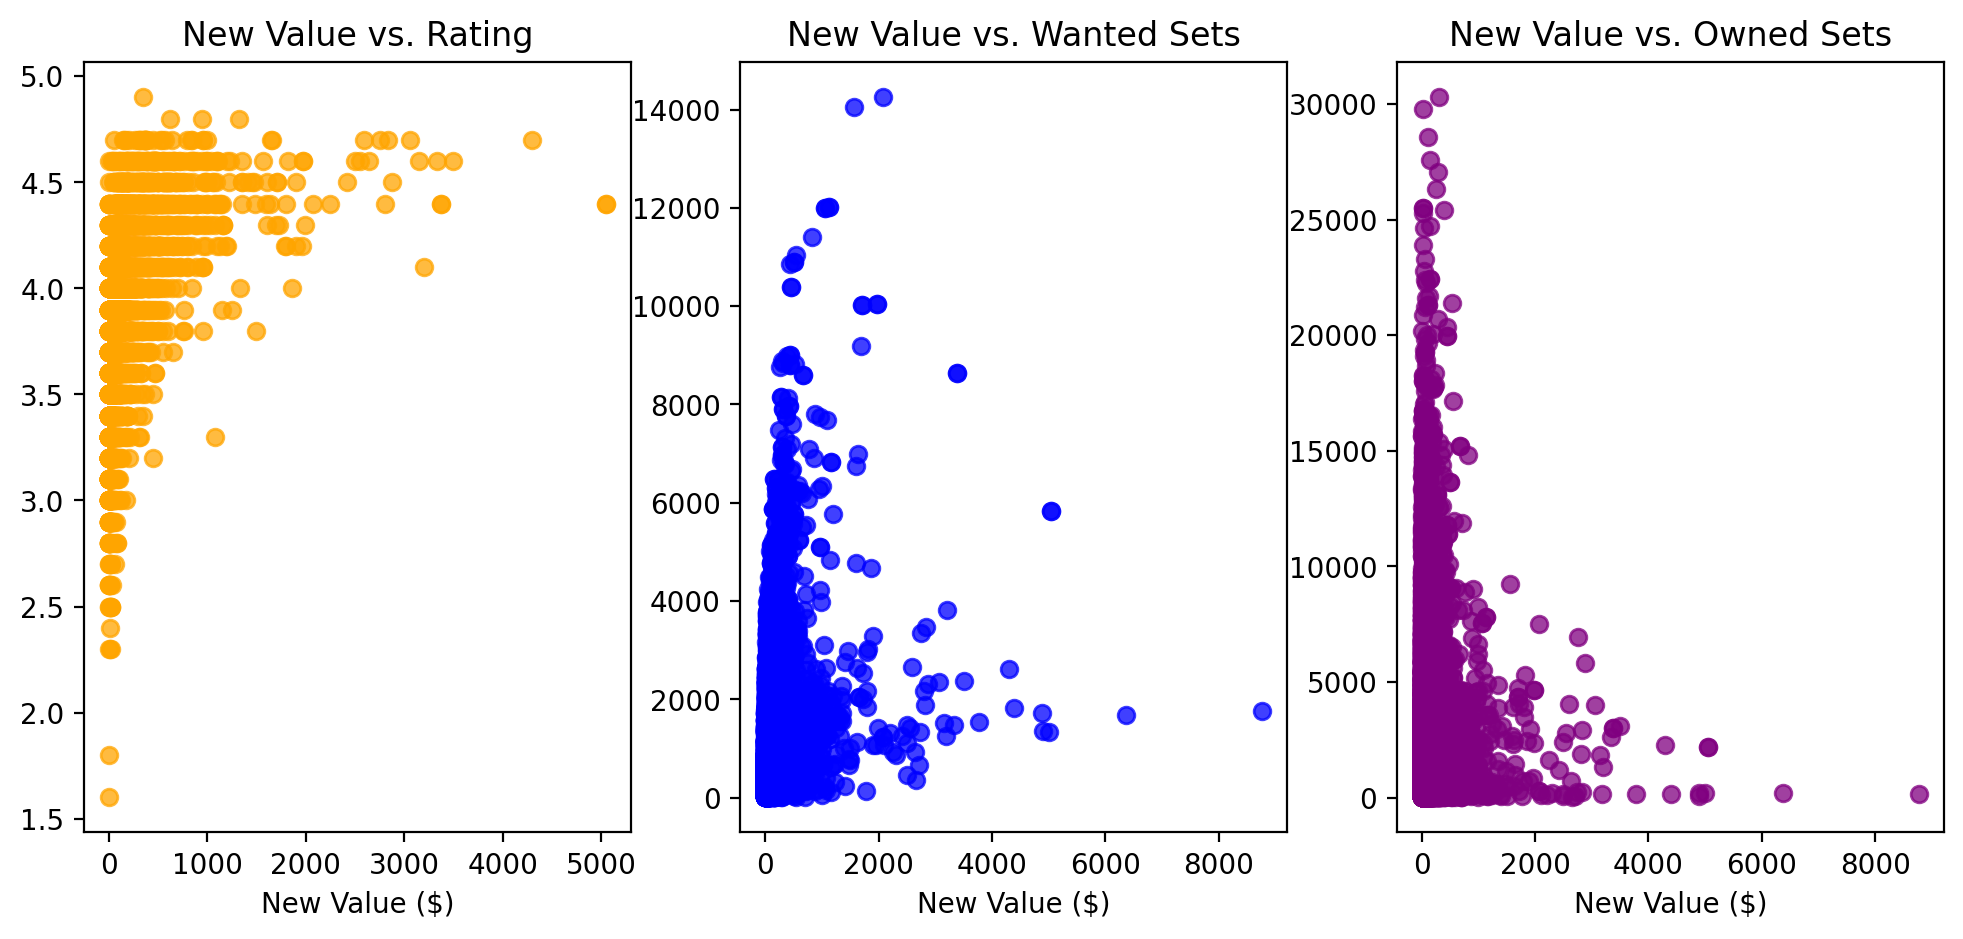

In [ ]:
# Some LEGO sets are missing new value information, so we will only work with ones that are entered
new_values = brickset['newValue'].notna()
newvalues_df = brickset[new_values].copy()

# Converting the newValue column to integer
newvalues_df['newValue'] = newvalues_df['newValue'].str.replace('[^\d.]', '', regex=True).astype(float).astype(int)

# Scatter plot for New Value vs Rating
plt.subplot(1, 3, 1)
plt.scatter(newvalues_df['newValue'], newvalues_df['Rating'], color = 'orange', alpha = 0.75)
plt.title('New Value vs. Rating')
plt.xlabel('New Value ($)')

# Scatter plot for New Value vs Wanted Sets
plt.subplot(1, 3, 2)
plt.scatter(newvalues_df['newValue'], newvalues_df['No_want'], color = 'blue', alpha = 0.75)
plt.title('New Value vs. Wanted Sets')
plt.xlabel('New Value ($)')


# Scatter plot for New Value vs Owned Sets
plt.subplot(1, 3, 3)
plt.scatter(newvalues_df['newValue'], newvalues_df['No_owned'], color = 'purple', alpha = 0.75)
plt.title('New Value vs. Owned Sets')
plt.xlabel('New Value ($)');

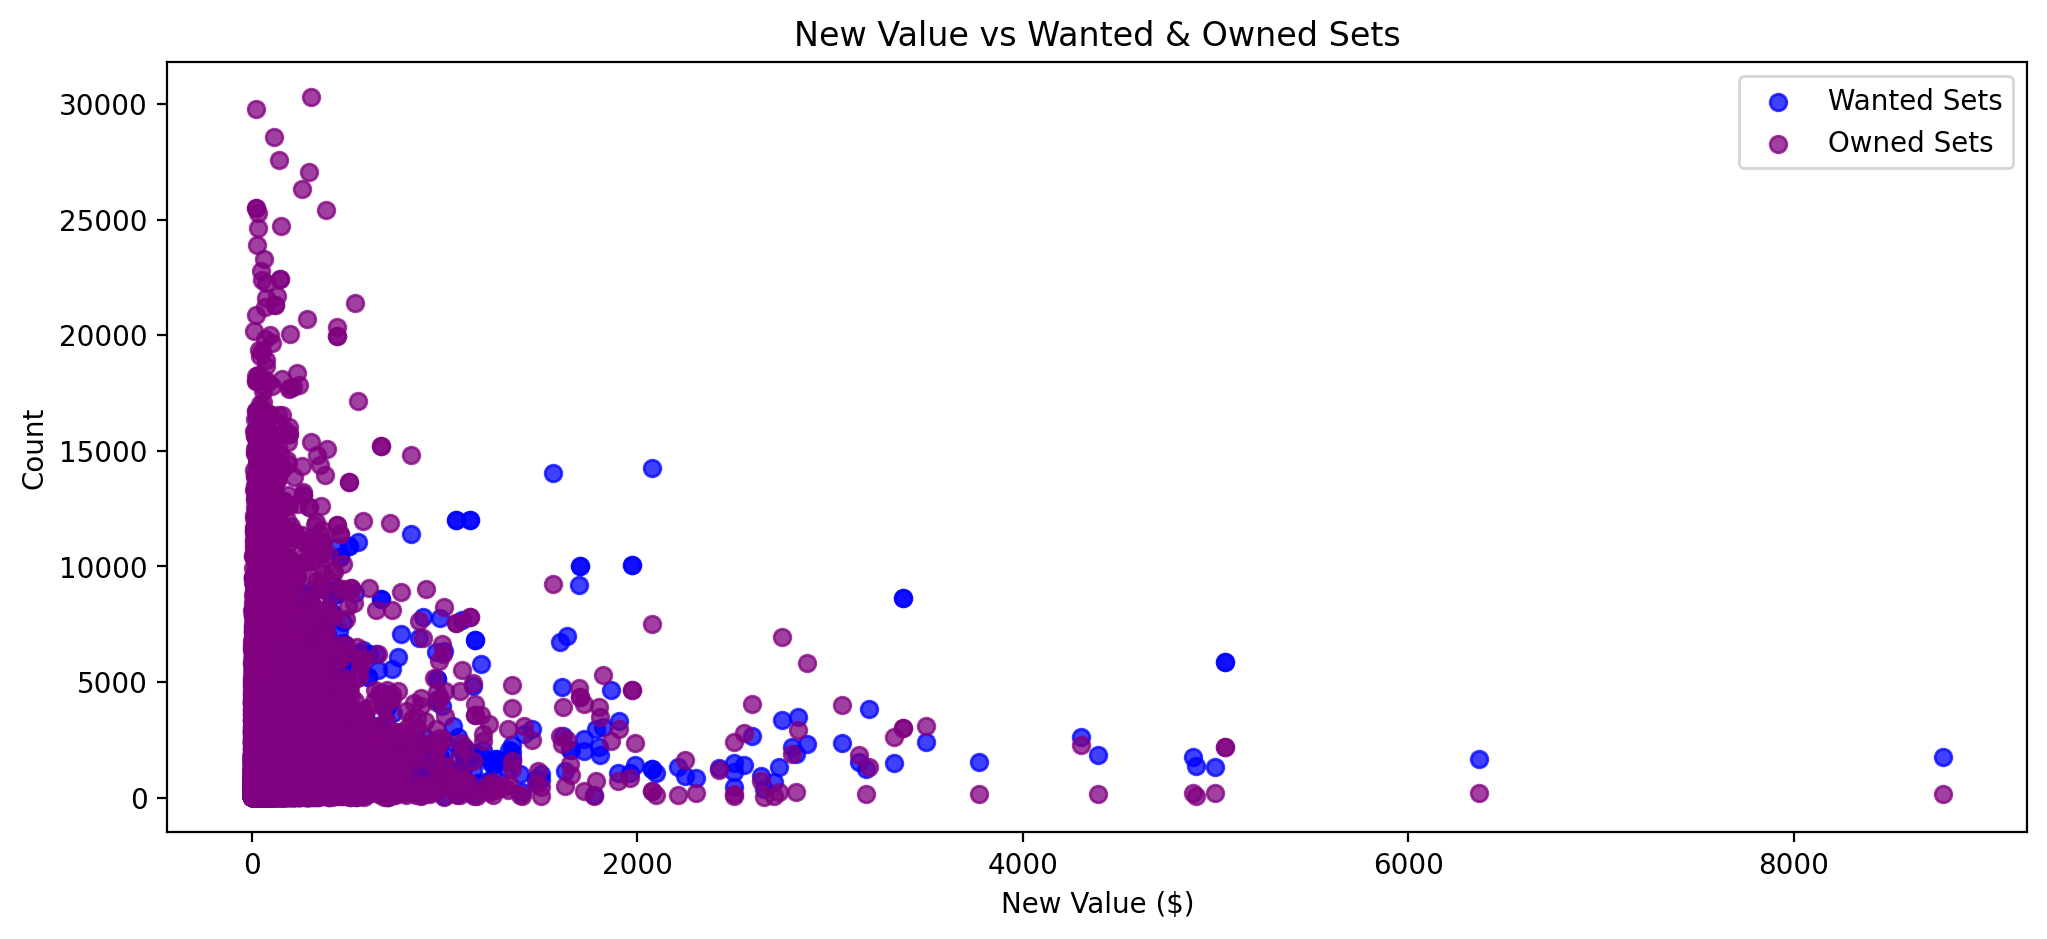

In [ ]:
# Scatter plot for New Value vs Wanted Sets
plt.scatter(newvalues_df['newValue'], newvalues_df['No_want'], label='Wanted Sets', color = 'blue', alpha = 0.75)

# Scatter plot for New Value vs Owned Sets
plt.scatter(newvalues_df['newValue'], newvalues_df['No_owned'], label='Owned Sets', color = 'purple', alpha = 0.75)

# Set titles and labels
plt.title('New Value vs Wanted & Owned Sets')
plt.xlabel('New Value ($)')
plt.ylabel('Count')
plt.legend();

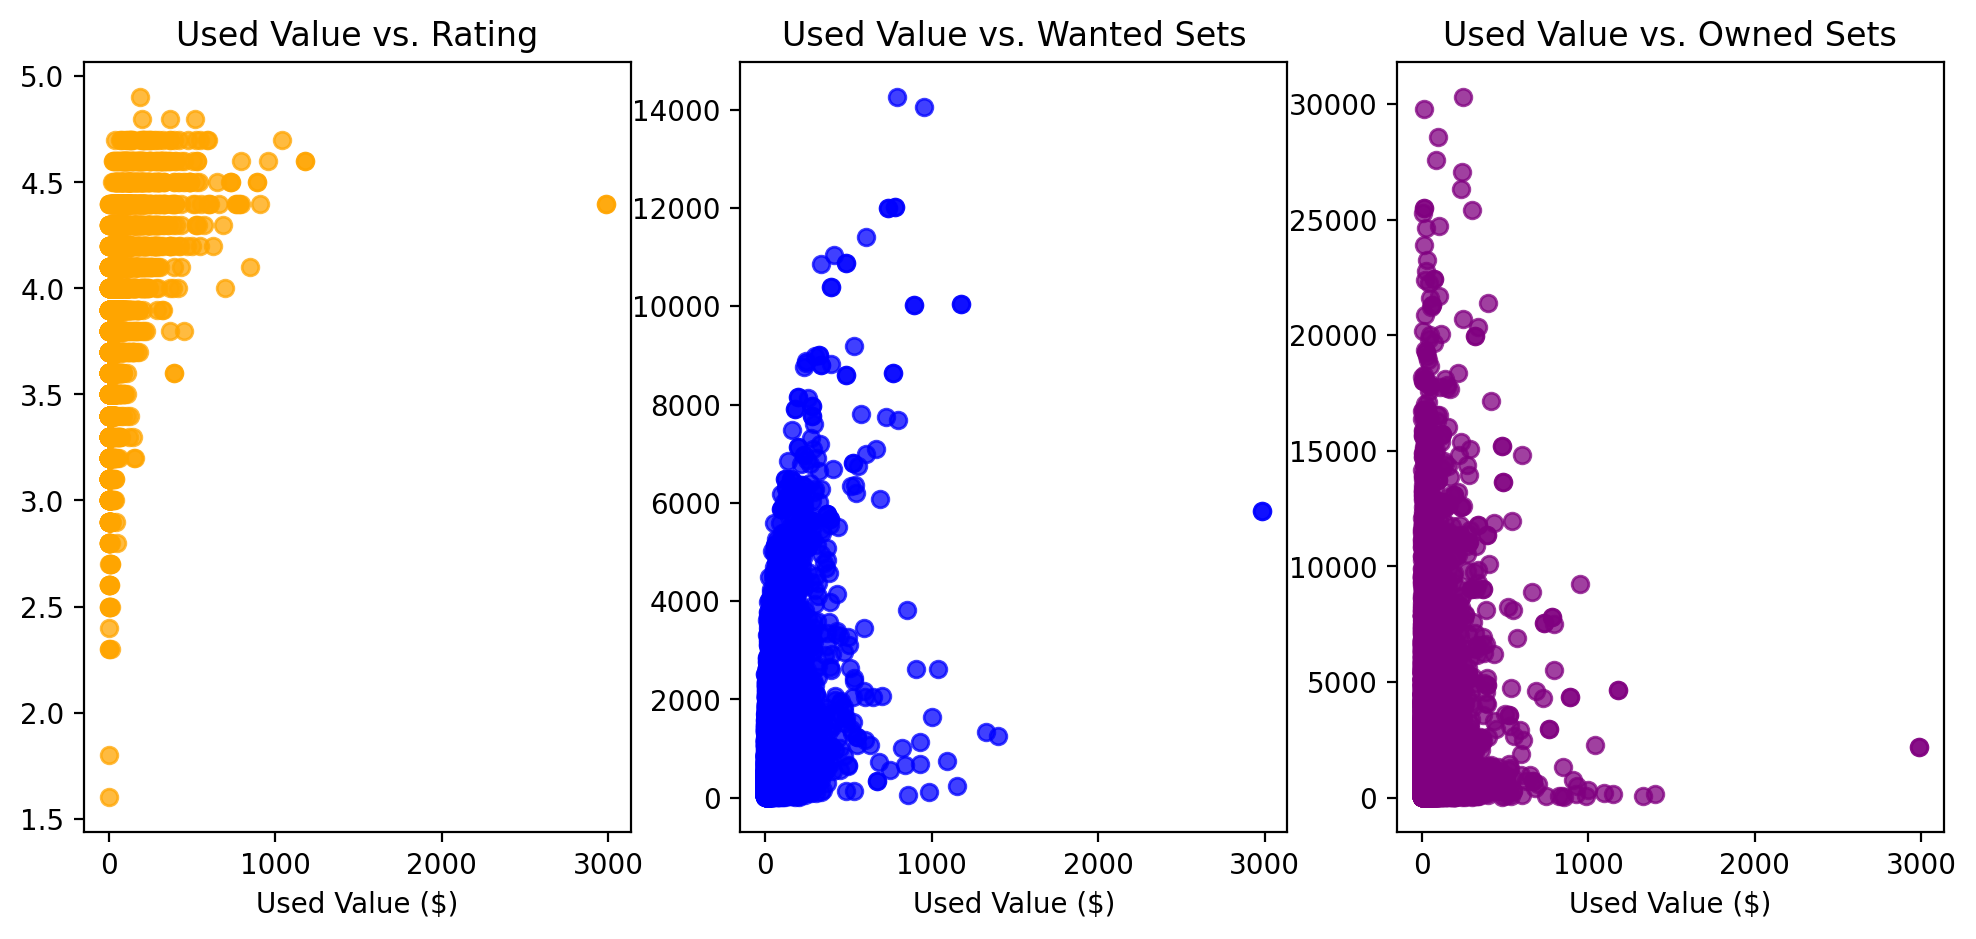

In [ ]:
# Some LEGO sets are missing new value information, so we will only work with ones that are entered
used_values = brickset['usedValue'].notna()
usedvalues_df = brickset[used_values].copy()

# Converting the newValue column to integer
usedvalues_df['usedValue'] = usedvalues_df['usedValue'].str.replace('[^\d.]', '', regex=True).astype(float).astype(int)

# Scatter plot for Used Value vs Rating
plt.subplot(1, 3, 1)
plt.scatter(usedvalues_df['usedValue'], usedvalues_df['Rating'], color = 'orange', alpha = 0.75)
plt.title('Used Value vs. Rating')
plt.xlabel('Used Value ($)')

# Scatter plot for Used Value vs Wanted Sets
plt.subplot(1, 3, 2)
plt.scatter(usedvalues_df['usedValue'], usedvalues_df['No_want'], color = 'blue', alpha = 0.75)
plt.title('Used Value vs. Wanted Sets')
plt.xlabel('Used Value ($)')

# Scatter plot for Used Value vs Owned Sets
plt.subplot(1, 3, 3)
plt.scatter(usedvalues_df['usedValue'], usedvalues_df['No_owned'], color = 'purple', alpha = 0.75)
plt.title('Used Value vs. Owned Sets')
plt.xlabel('Used Value ($)');


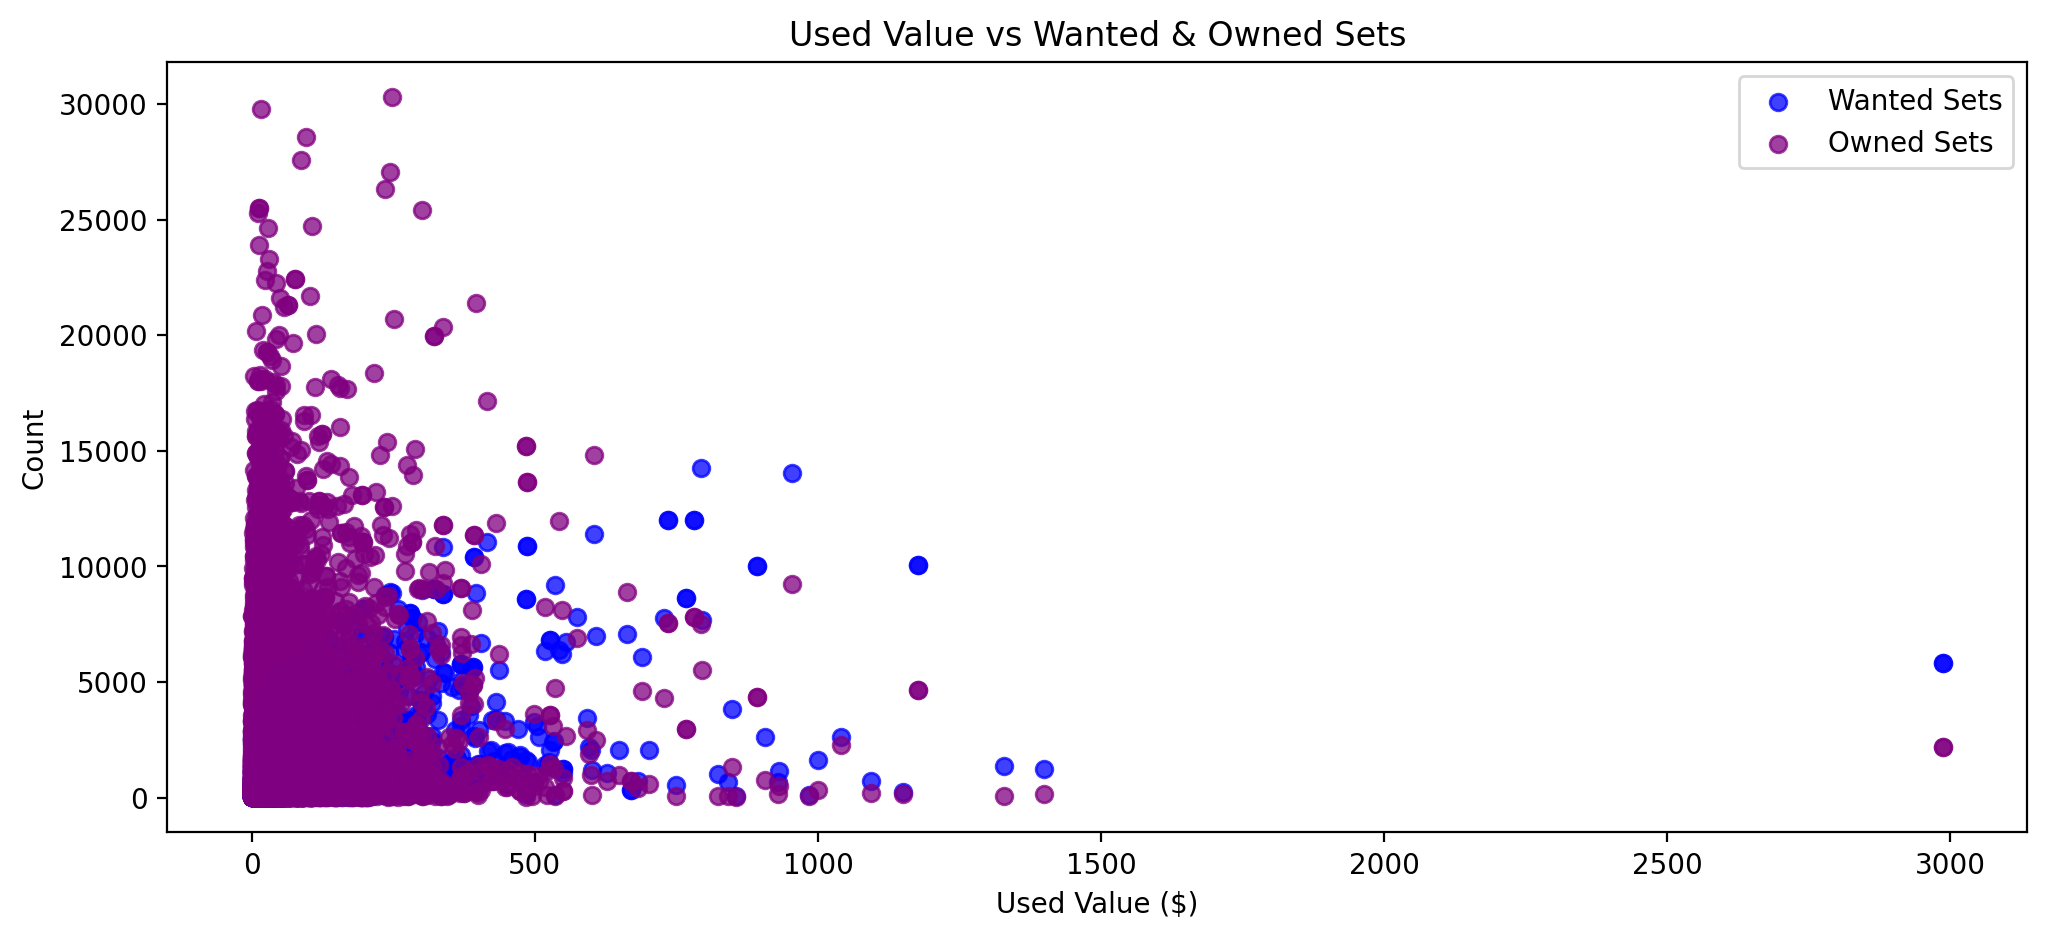

In [ ]:
# Scatter plot for Used Value vs Wanted Sets
plt.scatter(usedvalues_df['usedValue'], usedvalues_df['No_want'], label='Wanted Sets', color = 'blue', alpha = 0.75)

# Scatter plot for Used Value vs Owned Sets
plt.scatter(usedvalues_df['usedValue'], usedvalues_df['No_owned'], label='Owned Sets', color = 'purple', alpha = 0.75)
plt.title('Used Value vs Wanted & Owned Sets')
plt.xlabel('Used Value ($)')
plt.ylabel('Count')
plt.legend();

#### SQ4 Analysis
For the new values, ratings tend to converge on the 4.5 rating despite the increase in thousands of dollars to the value of the LEGO set. One might expect the ratings to increase for expensive LEGO sets, but that is not the case. LEGO sets that cost less than 1,000 (USD) have ratings varying from 1.5 to a little above 4.5 on the 5-point scale. There is more variability for number of wanted sets as new value increases with the demand dropping down to 4,000 or lower for sets that are thousands of dollars. In regards to outliers, the most wanted sets are approximately 2,000 (USD) and the most expensive set has only a demand of 2,000 or so people. Majority of the owned sets costs less than 1000 (USD). Not a lot of people own sets that are over 2,000 (USD) in new value. Even fewer people own sets that cost more than 8,000 (USD) in new value. When looking at wanted versus owned in the regard to new values, there is an overlap in the price range of 2,000 to 4,000 (USD) with a count lower than 5000 sets.


Comparison of used values and ratings were less variable. There is a single outlier where the used value is over 3,000 (USD) with a rating slightly below 4.5. Perhaps they were not happy with their second hand purchase. For used values, majority of owned and wanted sets seem to fall below 500 (USD) with a demand up to 15,000 people. We find that looking at used values is equally as important as new value given that LEGO sets have a thriving resell market.